In [60]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, pandas as pd
import seaborn as sns, math, os
from datetime import timedelta
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

df_сpi = pd.read_csv('russia.index.cpi.csv')
df_usd = pd.read_excel('RC_F01_12_2018_T02_12_2023.xlsx', index_col=0)

df_usd['data'] = pd.to_datetime(df_usd['data'])
df_usdR = df_usd.pivot(index="data", columns="cdx", values="curs")
usdR = df_usdR.resample('M').mean()
usdR.reset_index(drop=True, inplace=True)

/Users/max/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [61]:
df_cp = df_сpi.iloc[28:,1:]
df_cp = df_cp.fillna(df_cp.mean())
c = []
for i, row in df_cp.iterrows():
    for a in row:
        c.append(a)

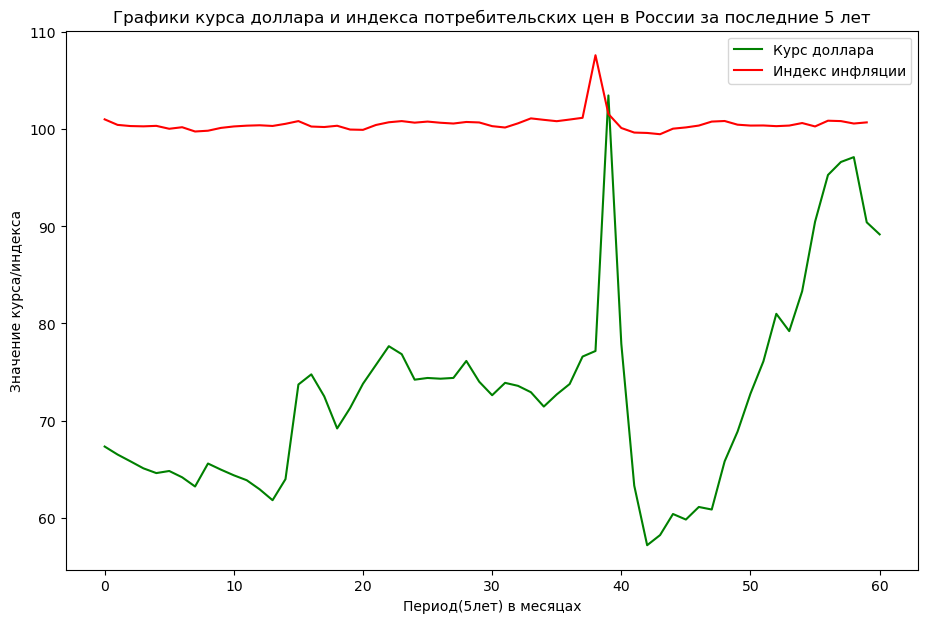

In [62]:
plt.plot(usdR, color = 'green')
plt.plot(c, color = 'red')
plt.title ("Графики курса доллара и индекса потребительских цен в России за последние 5 лет")
plt.xlabel("Период(5лет) в месяцах")
plt.ylabel("Значение курса/индекса")
plt.legend(["Курс доллара","Индекс инфляции"])

In [63]:
df1 = pd.DataFrame(c, b)
# df1 = df.groupby('budget')[['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']].mean().corr()
# sns.heatmap(data=df1, annot=True, cmap='PuBu')
df1

NameError: name 'b' is not defined

In [64]:
usdR = usdR.iloc[:60]
usdR

cdx,Доллар США
0,67.335314
1,66.512544
2,65.810525
3,65.092257
4,64.603105
5,64.818706
6,64.169050
7,63.222682
8,65.587483
9,64.958705


<Axes: xlabel='cdx'>

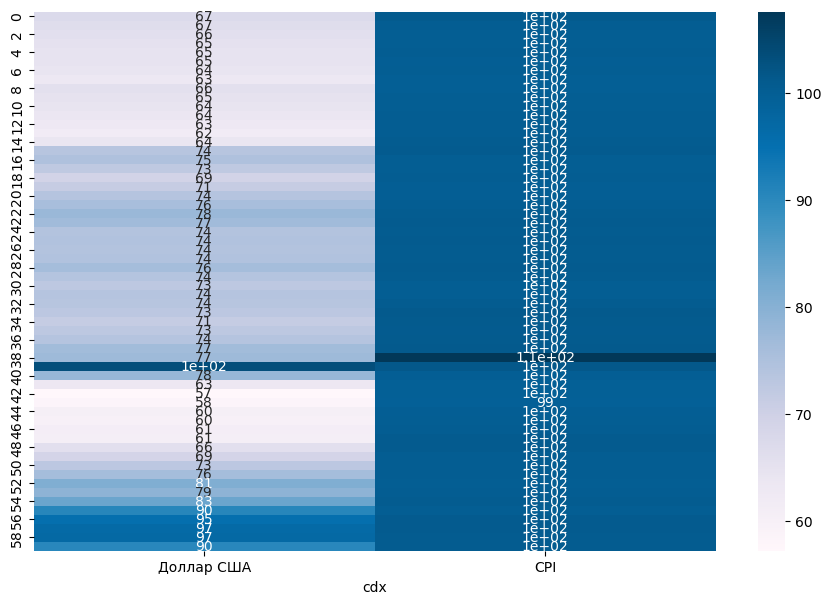

In [71]:
usdR.insert(loc=len(usdR.columns), column='CPI', value=c)

<Axes: xlabel='cdx', ylabel='cdx'>

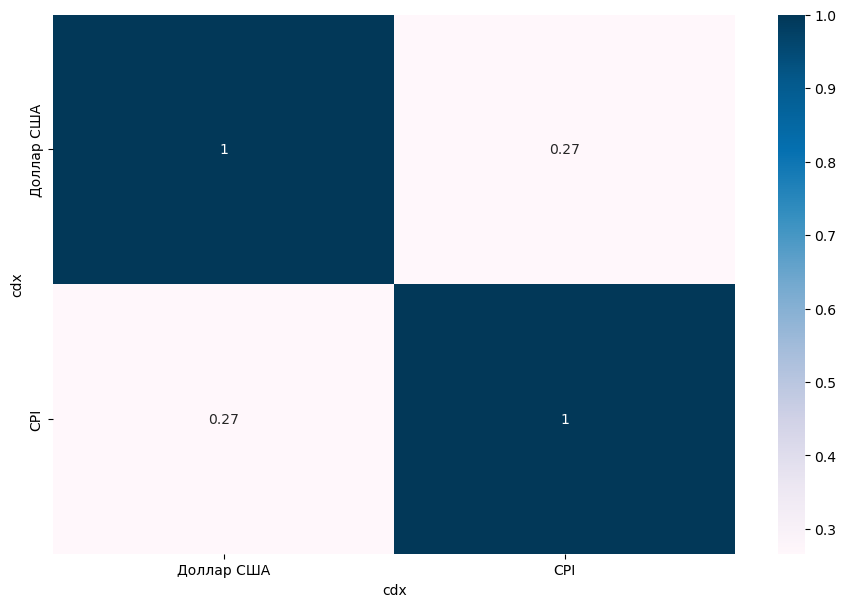

In [73]:
usdR
usdR = usdR.groupby('Доллар США')[['Доллар США', 'CPI']].mean().corr()
sns.heatmap(data=usdR, annot=True, cmap='PuBu')

<Axes: xlabel='cdx'>

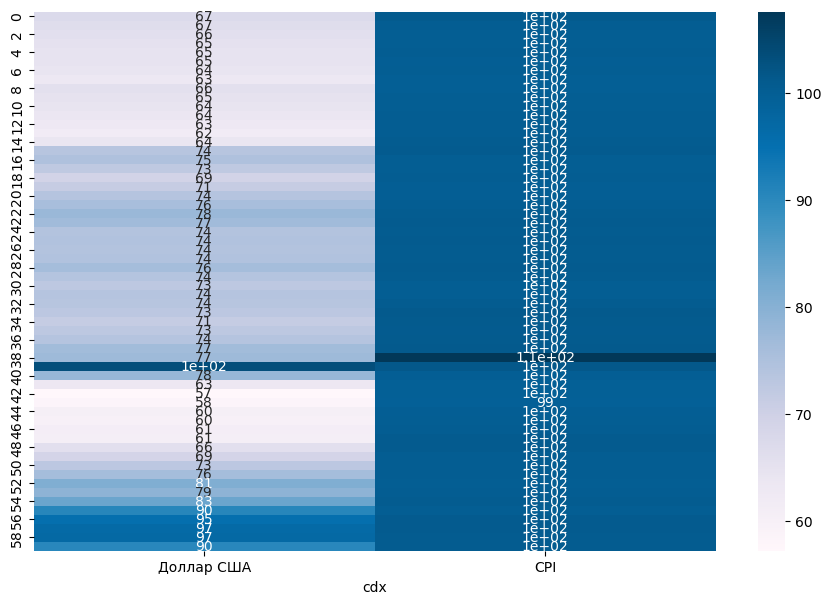

In [72]:
sns.heatmap(data=usdR, annot=True, cmap='PuBu')